# Air Quality of Odisha Analysis
## L.Guna Vardhan Reddy

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date

spark = SparkSession.builder.appName("AirQuality_Odisha").getOrCreate()
df = spark.read.csv("cpcb_dly_aq_odisha-2015_0.csv", header=True, inferSchema=True)
df.show()

+--------+-------------+------+----------------------+------------------------------+--------------------+----------------+---+---+---------+------+----+
|Stn Code|Sampling Date| State|City/Town/Village/Area|Location of Monitoring Station|              Agency|Type of Location|SO2|NO2|RSPM/PM10|PM 2.5|_c11|
+--------+-------------+------+----------------------+------------------------------+--------------------+----------------+---+---+---------+------+----+
|      68|     02-01-15|Odisha|               Talcher|          T.T.P.S.Colony, T...|Odisha State Poll...| Industrial Area| 11| 24|      143|   102|NULL|
|      68|     06-01-15|Odisha|               Talcher|          T.T.P.S.Colony, T...|Odisha State Poll...| Industrial Area| 10| 23|      133|    96|NULL|
|      68|     09-01-15|Odisha|               Talcher|          T.T.P.S.Colony, T...|Odisha State Poll...| Industrial Area|  8| 25|      125|   116|NULL|
|      68|     13-01-15|Odisha|               Talcher|          T.T.P.S.Colo

In [3]:
df.printSchema()

root
 |-- Stn Code: integer (nullable = true)
 |-- Sampling Date: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City/Town/Village/Area: string (nullable = true)
 |-- Location of Monitoring Station: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Type of Location: string (nullable = true)
 |-- SO2: integer (nullable = true)
 |-- NO2: integer (nullable = true)
 |-- RSPM/PM10: integer (nullable = true)
 |-- PM 2.5: string (nullable = true)
 |-- _c11: string (nullable = true)



In [4]:
df.show(5)

+--------+-------------+------+----------------------+------------------------------+--------------------+----------------+---+---+---------+------+----+
|Stn Code|Sampling Date| State|City/Town/Village/Area|Location of Monitoring Station|              Agency|Type of Location|SO2|NO2|RSPM/PM10|PM 2.5|_c11|
+--------+-------------+------+----------------------+------------------------------+--------------------+----------------+---+---+---------+------+----+
|      68|     02-01-15|Odisha|               Talcher|          T.T.P.S.Colony, T...|Odisha State Poll...| Industrial Area| 11| 24|      143|   102|NULL|
|      68|     06-01-15|Odisha|               Talcher|          T.T.P.S.Colony, T...|Odisha State Poll...| Industrial Area| 10| 23|      133|    96|NULL|
|      68|     09-01-15|Odisha|               Talcher|          T.T.P.S.Colony, T...|Odisha State Poll...| Industrial Area|  8| 25|      125|   116|NULL|
|      68|     13-01-15|Odisha|               Talcher|          T.T.P.S.Colo

In [5]:
from pyspark.sql.types import *

schema = StructType([
    StructField("Stn Code", IntegerType(), True),
    StructField("Sampling Date", StringType(), True),
    StructField("State", StringType(), True),
    StructField("City/Town/Village/Area", StringType(), True),
    StructField("Location of Monitoring Station", StringType(), True),
    StructField("Agency", StringType(), True),
    StructField("Type of Location", StringType(), True),
    StructField("SO2", IntegerType(), True),
    StructField("NO2", IntegerType(), True),
    StructField("RSPM/PM10", IntegerType(), True),
    StructField("PM 2.5", DoubleType(), True),
    StructField("Unnamed: 11", DoubleType(), True)
])

df = spark.read.csv("cpcb_dly_aq_odisha-2015_0.csv", header=True, schema=schema)

df.printSchema()


root
 |-- Stn Code: integer (nullable = true)
 |-- Sampling Date: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City/Town/Village/Area: string (nullable = true)
 |-- Location of Monitoring Station: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Type of Location: string (nullable = true)
 |-- SO2: integer (nullable = true)
 |-- NO2: integer (nullable = true)
 |-- RSPM/PM10: integer (nullable = true)
 |-- PM 2.5: double (nullable = true)
 |-- Unnamed: 11: double (nullable = true)



In [6]:
from pyspark.sql.functions import col

df_clean = df \
    .withColumnRenamed("RSPM/PM10", "PM10") \
    .withColumnRenamed("PM 2.5", "PM2_5") \
    .withColumnRenamed("City/Town/Village/Area", "City_Area") \
    .drop("Unnamed: 11")

df_clean.printSchema()


root
 |-- Stn Code: integer (nullable = true)
 |-- Sampling Date: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City_Area: string (nullable = true)
 |-- Location of Monitoring Station: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Type of Location: string (nullable = true)
 |-- SO2: integer (nullable = true)
 |-- NO2: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM2_5: double (nullable = true)



In [13]:
from pyspark.sql.functions import col

df = df \
    .withColumnRenamed("RSPM/PM10", "PM10") \
    .withColumnRenamed("PM 2.5", "PM2_5") \
    .withColumnRenamed("City/Town/Village/Area", "City_Area") \
    .drop("Unnamed: 11")
df.printSchema()


root
 |-- Stn Code: integer (nullable = true)
 |-- Sampling Date: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City_Area: string (nullable = true)
 |-- Location of Monitoring Station: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Type of Location: string (nullable = true)
 |-- SO2: integer (nullable = true)
 |-- NO2: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM2_5: double (nullable = true)



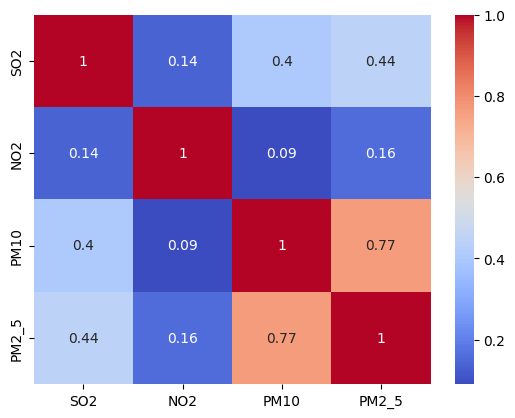

In [15]:
pdf = df.toPandas()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pdf[["SO2","NO2","PM10","PM2_5"]].corr(), annot=True, cmap="coolwarm"); plt.show()


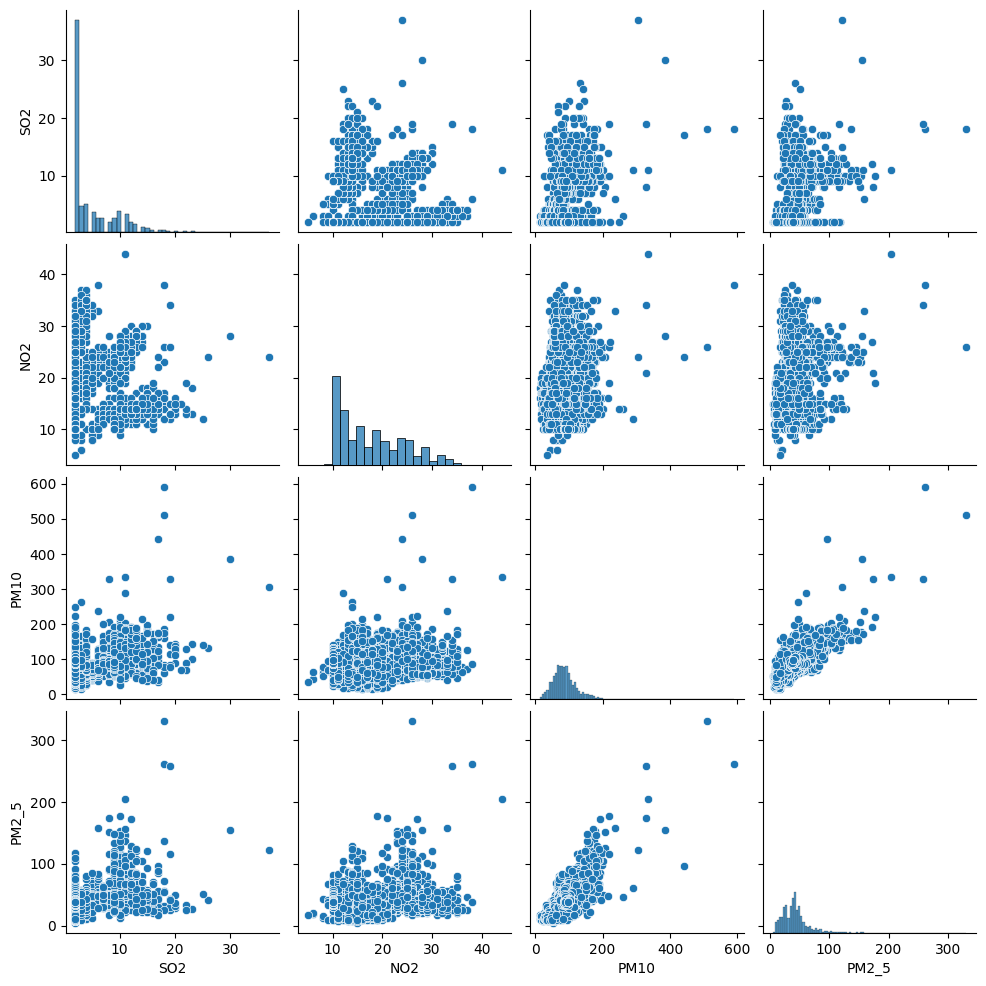

In [16]:
sns.pairplot(pdf[["SO2","NO2","PM10","PM2_5"]]); plt.show()


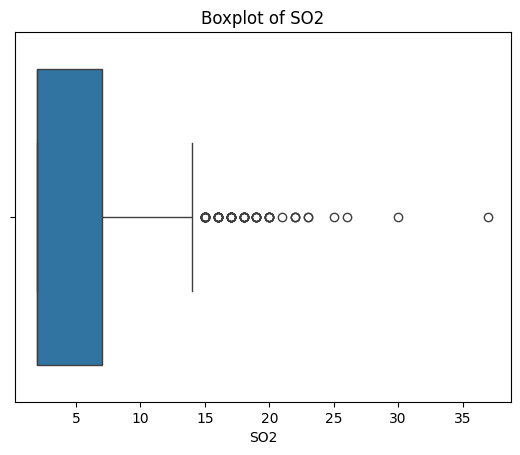

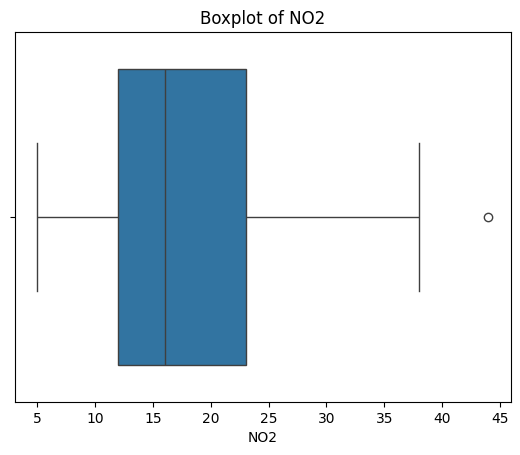

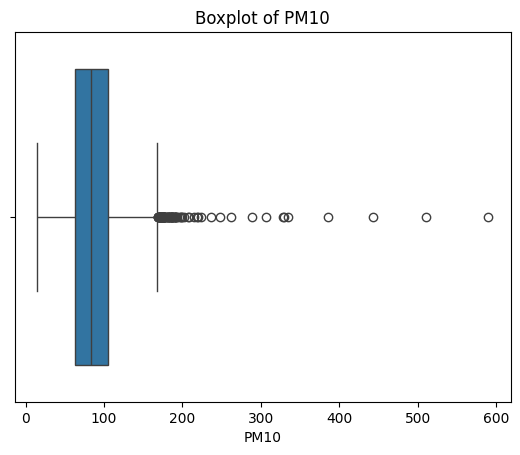

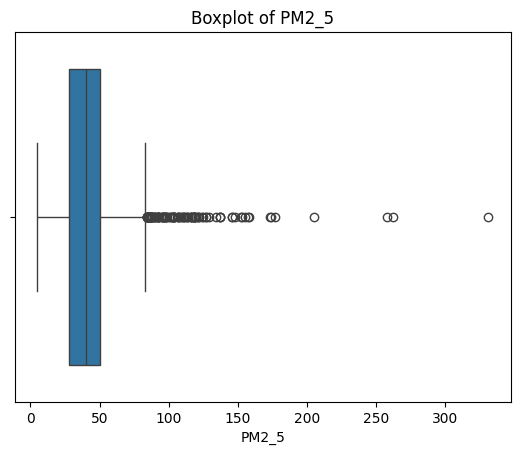

In [18]:
for col in ["SO2","NO2","PM10","PM2_5"]:
    sns.boxplot(x=pdf[col]); plt.title(f"Boxplot of {col}"); plt.show()

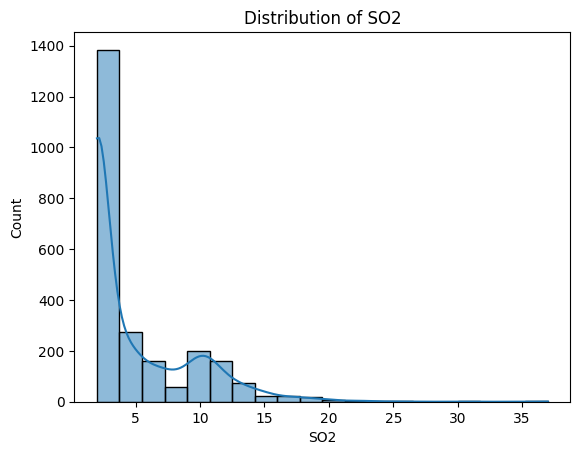

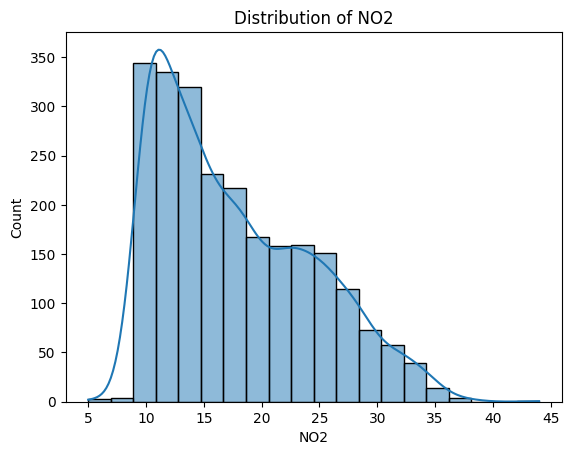

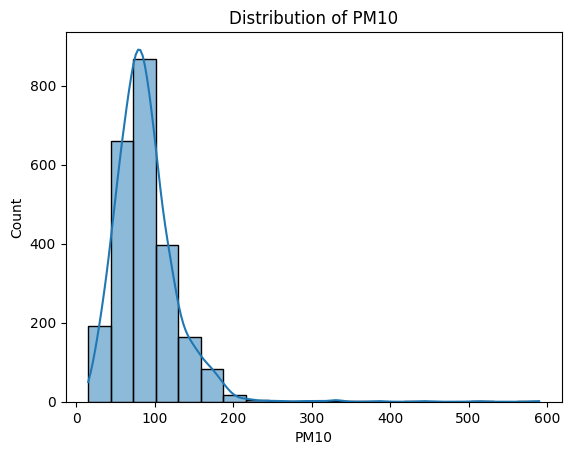

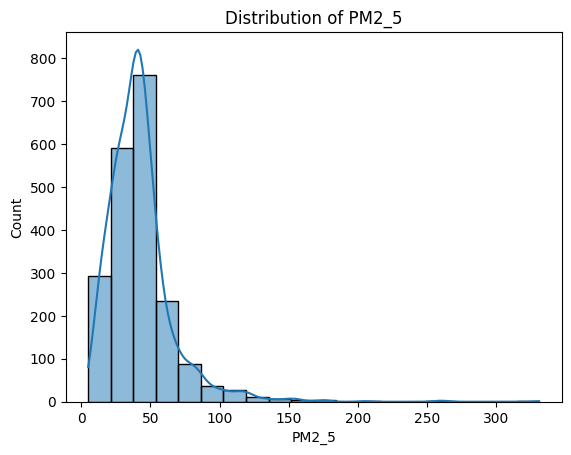

In [20]:
for col in ["SO2","NO2","PM10","PM2_5"]:
    sns.histplot(pdf[col], kde=True, bins=20); plt.title(f"Distribution of {col}"); plt.show()


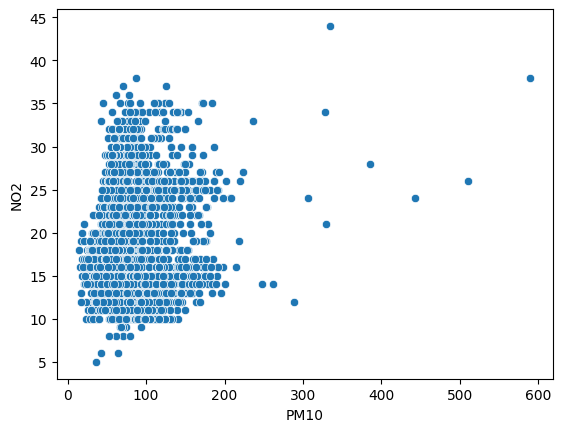

In [21]:
sns.scatterplot(x="PM10", y="NO2", data=pdf); plt.show()

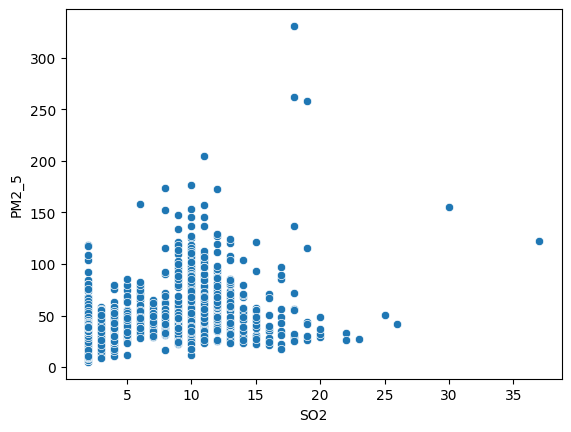

In [23]:
sns.scatterplot(x="SO2", y="PM2_5", data=pdf); plt.show()


<Axes: xlabel='City_Area', ylabel='PM10'>

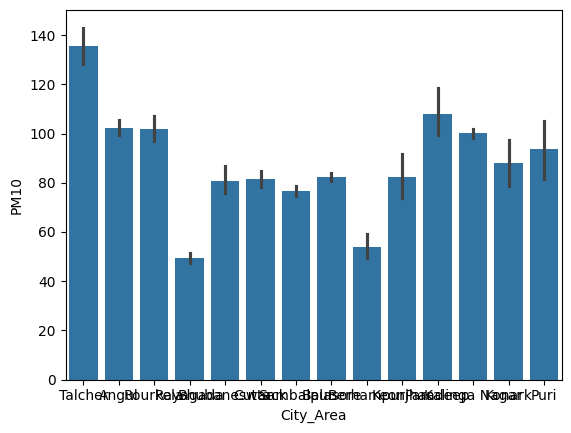

In [25]:
sns.barplot(x="City_Area", y="PM10", data=pdf)


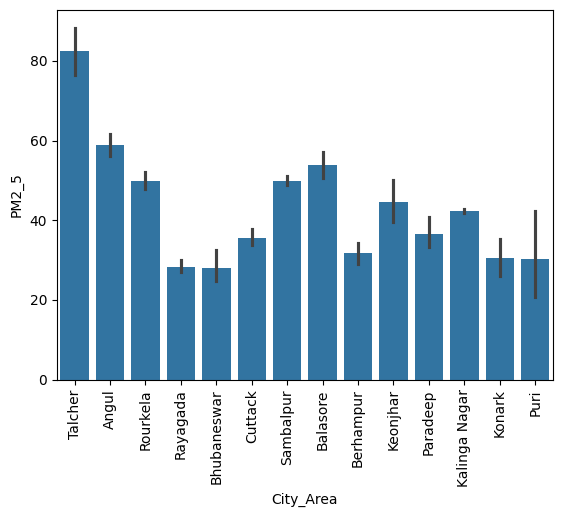

In [26]:
sns.barplot(x="City_Area", y="PM2_5", data=pdf); plt.xticks(rotation=90); plt.show()

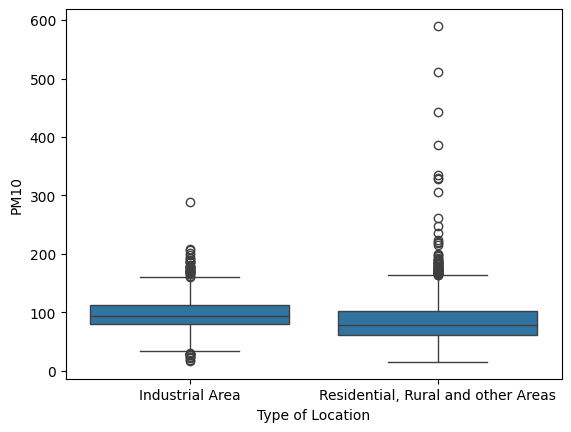

In [27]:
sns.boxplot(x="Type of Location", y="PM10", data=pdf); plt.show()

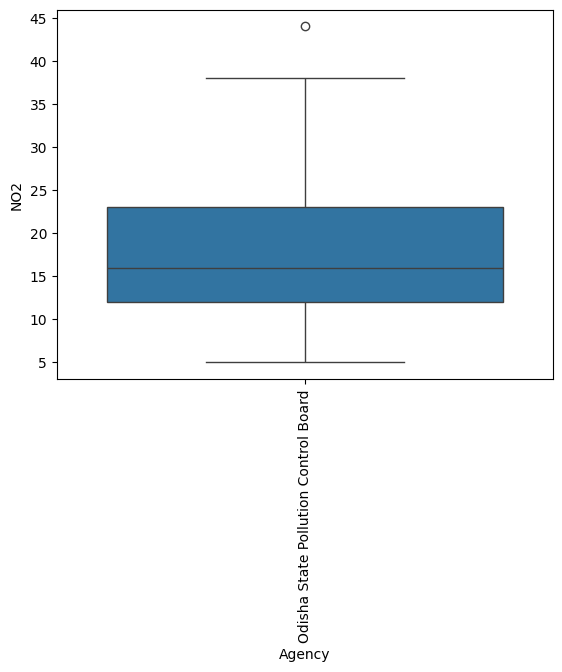

In [28]:
sns.boxplot(x="Agency", y="NO2", data=pdf); plt.xticks(rotation=90); plt.show()


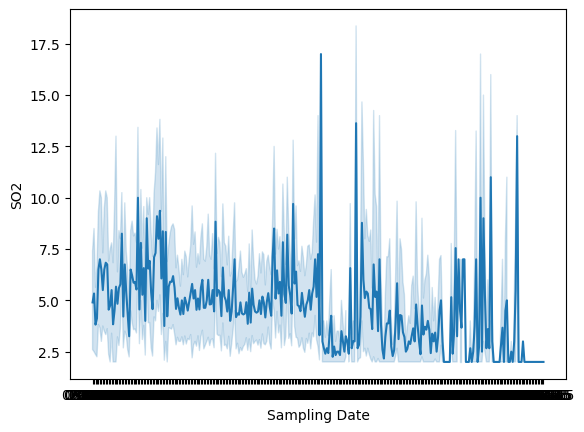

In [29]:
sns.lineplot(x="Sampling Date", y="SO2", data=pdf); plt.show()


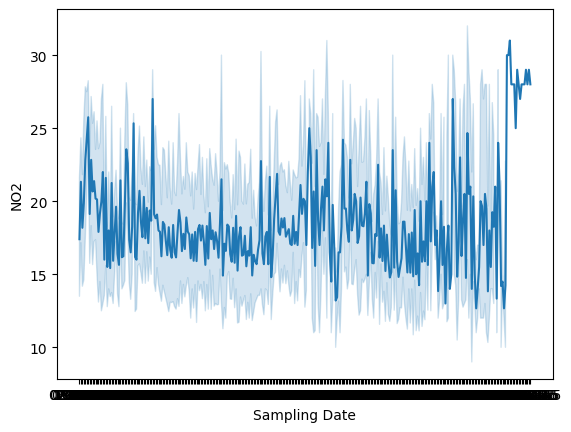

In [30]:
sns.lineplot(x="Sampling Date", y="NO2", data=pdf); plt.show()

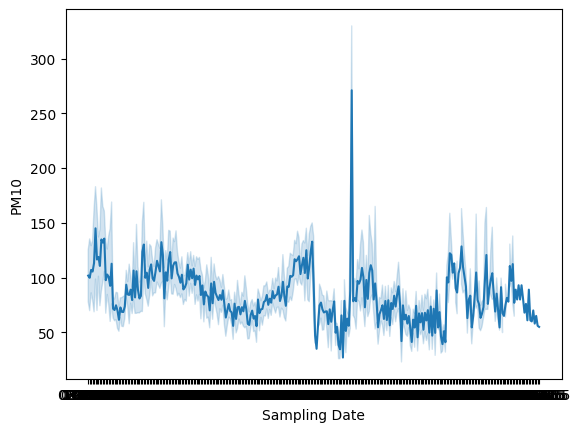

In [31]:
sns.lineplot(x="Sampling Date", y="PM10", data=pdf); plt.show()

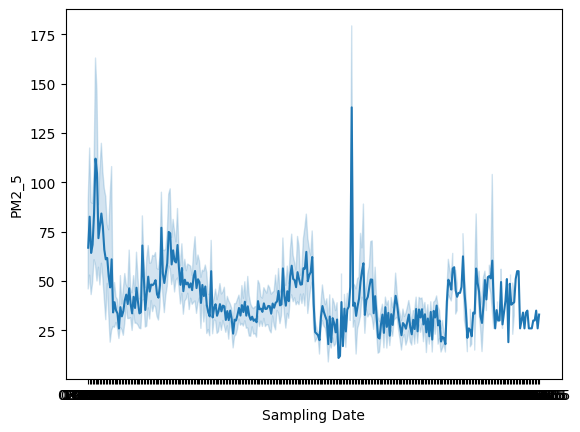

In [32]:
sns.lineplot(x="Sampling Date", y="PM2_5", data=pdf); plt.show()